In [2]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
print_tensor = lambda n, x: print(n, type(x), x.shape, x.min(), x.max())
print(sys.path)
# from pathlib import Pathth


['/Users/monolith/Documents/git/mmseg4med/demo', '/Users/monolith/miniconda3/lib/python38.zip', '/Users/monolith/miniconda3/lib/python3.8', '/Users/monolith/miniconda3/lib/python3.8/lib-dynload', '', '/Users/monolith/.local/lib/python3.8/site-packages', '/Users/monolith/miniconda3/lib/python3.8/site-packages', '/Users/monolith/Documents/git/mmaction2', '/Users/monolith/Documents/git/nnDetection', '/Users/monolith/.local/lib/python3.8/site-packages/IPython/extensions', '/Users/monolith/.ipython', '/Users/monolith/Documents/git/mmseg4med']


In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
from demo.visual_gt_pred import *
import re


In [29]:
tb_rt = Path('/Users/monolith/Desktop/lung_nodule/结节统计')
csv_fps = [tb_rt/a for a in os.listdir(tb_rt) if a.endswith('.csv')]

tbs = [pd.read_csv(p) for p in csv_fps]

tb_all = pd.concat(tbs, axis = 0)
tb_all.reset_index(inplace = True, drop = True)


tb_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18607 entries, 0 to 18606
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   filename                                18607 non-null  object 
 1   nodule_x1_voxel                         18607 non-null  int64  
 2   nodule_y1_voxel                         18607 non-null  int64  
 3   nodule_z1_voxel                         18607 non-null  int64  
 4   nodule_x2_voxel                         18607 non-null  int64  
 5   nodule_y2_voxel                         18607 non-null  int64  
 6   nodule_z2_voxel                         18607 non-null  int64  
 7   feature_original_shape_VoxelVolume      18607 non-null  float64
 8   feature_original_shape_MajorAxisLength  18607 non-null  object 
 9   feature_original_shape_LeastAxisLength  18607 non-null  object 
 10  feature_original_shape_MinorAxisLength  18607 non-null  ob

In [30]:
tb_all.head()

,filename,nodule_x1_voxel,nodule_y1_voxel,nodule_z1_voxel,nodule_x2_voxel,nodule_y2_voxel,nodule_z2_voxel,feature_original_shape_VoxelVolume,feature_original_shape_MajorAxisLength,feature_original_shape_LeastAxisLength,feature_original_shape_MinorAxisLength,feature_Mean,feature_Maximum,feature_Minimum,feature_Range,class
0,1.2.840.113619.2.359.3.2831198759.197.15663478...,116,242,184,125,252,194,156.298003,7.750716,5.091141,6.255336,-497.050398,64.0,-989.0,1053.0,1
1,1.2.840.113619.2.359.3.2831198759.197.15663478...,190,262,224,232,303,280,16770.734236,33.132054,25.565297,27.578751,-44.949397,240.0,-995.0,1235.0,1
2,1.2.840.113619.2.359.3.2831198759.197.15663478...,340,343,238,344,347,242,20.314595,3.401761,2.553807,3.148188,-456.000000,-40.0,-773.0,733.0,1
3,1.2.840.113770.2.2.1004411424.3348483762.36866...,101,395,156,109,403,160,70.997620,5.429129,3.925898,4.663698,-251.248447,119.0,-775.0,894.0,1
4,1.2.840.113770.2.2.1004411424.3348483762.36866...,178,327,293,185,337,298,73.202515,6.288555,3.521012,4.973087,-463.765060,75.0,-824.0,899.0,1


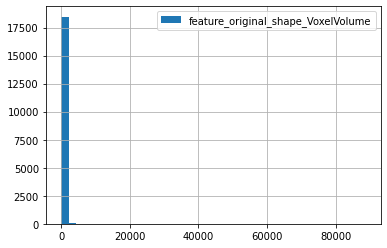

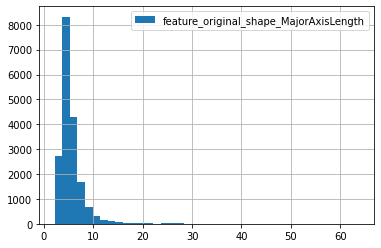

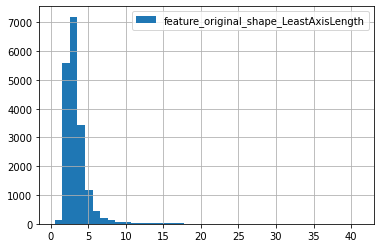

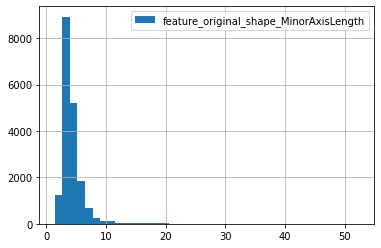

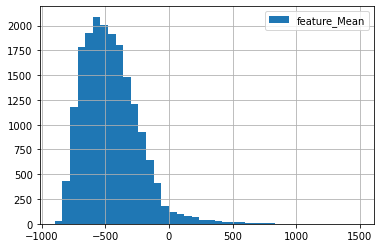

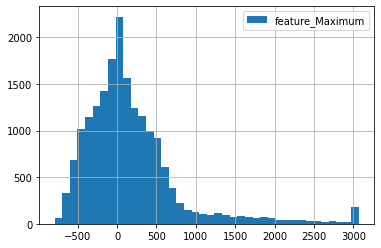

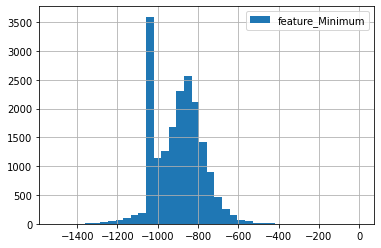

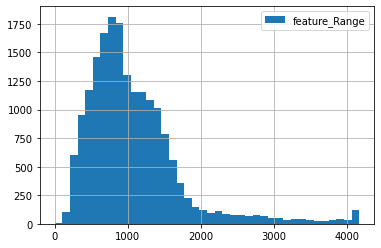

In [46]:
keys = ['feature_original_shape_VoxelVolume', 
       'feature_original_shape_MajorAxisLength', 
       'feature_original_shape_LeastAxisLength', 
       'feature_original_shape_MinorAxisLength', 
        'feature_Mean', 'feature_Maximum', 'feature_Minimum', 
        'feature_Range'
       ]
# k = keys[2]
for k in keys:
    this_feat = tb_all[k]
    this_feat = this_feat.apply(lambda x: float(x[1:-4][:8]) if isinstance(x, str) else x)
    plt.figure()
    this_feat.hist(legend= True, bins = 40)
    tb_all[k] = this_feat





<AxesSubplot:>

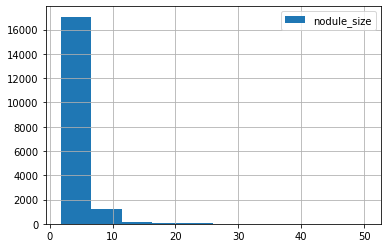

In [45]:
tb_all['nodule_size'] = (tb_all[keys[1]] + tb_all[keys[2]]) /2
tb_all['nodule_size'].hist(legend = True, bins = 40)

In [47]:
lump_tb = tb_all.loc[tb_all['class'] == 4, :]
other_tb = tb_all.loc[tb_all['class'] != 4, :]



array([[<AxesSubplot:title={'center':'feature_original_shape_MajorAxisLength'}>,
        <AxesSubplot:title={'center':'feature_original_shape_LeastAxisLength'}>],
       [<AxesSubplot:title={'center':'feature_original_shape_MinorAxisLength'}>,
        <AxesSubplot:title={'center':'nodule_size'}>]], dtype=object)

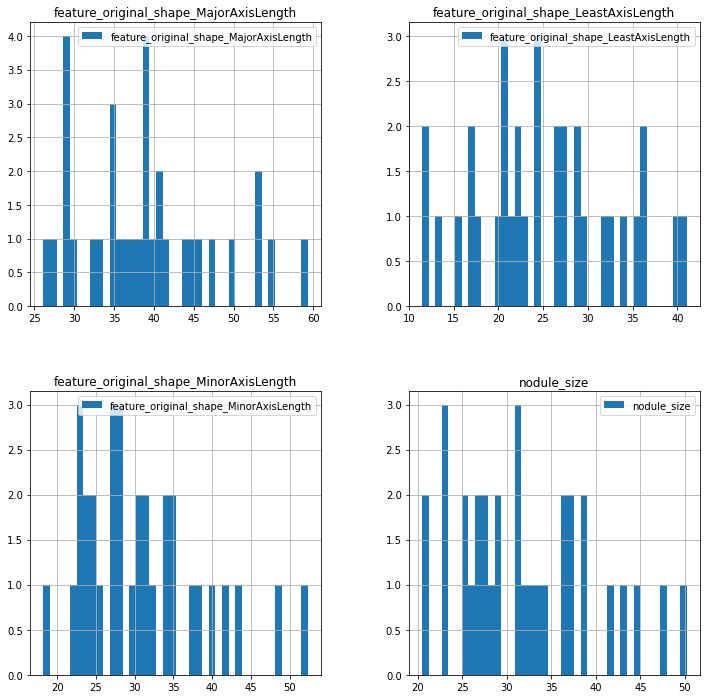

In [54]:
plot_cols = ['feature_original_shape_MajorAxisLength', 
       'feature_original_shape_LeastAxisLength', 
       'feature_original_shape_MinorAxisLength', 'nodule_size']
lump_tb[plot_cols].hist(bins = 40, figsize=(12, 12))

array([[<AxesSubplot:title={'center':'feature_original_shape_MajorAxisLength'}>,
        <AxesSubplot:title={'center':'feature_original_shape_LeastAxisLength'}>],
       [<AxesSubplot:title={'center':'feature_original_shape_MinorAxisLength'}>,
        <AxesSubplot:title={'center':'nodule_size'}>]], dtype=object)

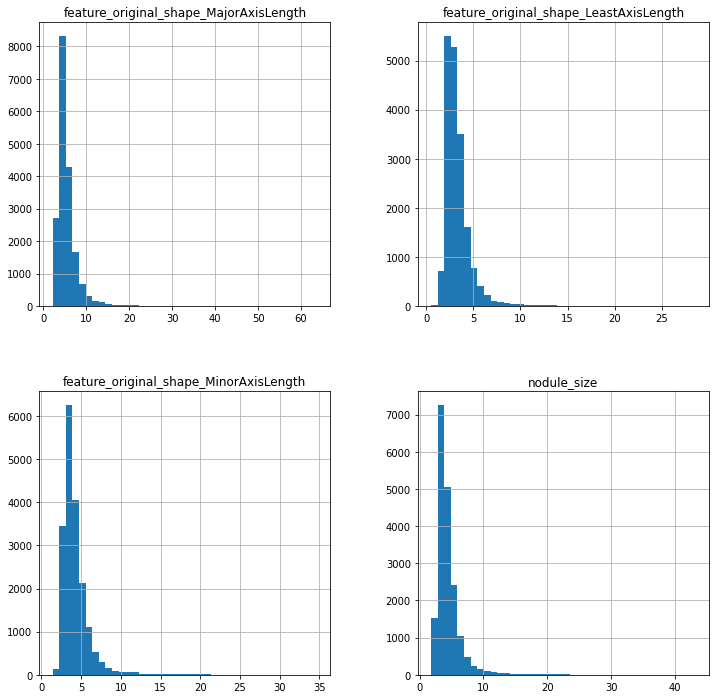

In [55]:
other_tb[plot_cols].hist(bins = 40, figsize=(12, 12))

In [56]:
tb_all.to_excel(tb_rt/'nodule_property_all.xlxs')

In [6]:
chest_rt = Path('/Users/monolith/Desktop/lung_nodule/shchest/rebuild')
nodule_fn = 'nodule_instance_info_shchest.csv'
chest_tb = pd.read_csv(chest_rt/nodule_fn)
print(chest_tb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   spacing_group                           698 non-null    int64  
 1   patho_group                             698 non-null    object 
 2   mid_z                                   698 non-null    int64  
 3   nodule_loc                              696 non-null    object 
 4   patho_type                              697 non-null    object 
 5   nodule_type                             698 non-null    object 
 6   num_slices                              698 non-null    int64  
 7   image_size                              698 non-null    object 
 8   real_spacing                            698 non-null    float64
 9   slice_thickness                         698 non-null    float64
 10  SeriesInstanceUID                       698 non-null    object

<ipython-input-20-7dbfc4d50542>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chest_measure_tb['nodule_size'] = chest_tb.apply(lambda x: (x[measure_cols[0]] + x[measure_cols[1]])/2, axis= 1)


       original_shape_MajorAxisLength  original_shape_MinorAxisLength  \
count                      698.000000                      698.000000   
mean                        19.599158                       14.716833   
std                         11.148276                        7.511140   
min                          4.283617                        3.763134   
25%                         11.254984                        9.203025   
50%                         16.357292                       12.875651   
75%                         25.042193                       18.752862   
max                        101.868993                       91.946658   

       nodule_size  
count   698.000000  
mean     17.157995  
std       9.092629  
min       4.023376  
25%      10.247899  
50%      14.870707  
75%      22.165157  
max      96.907825  


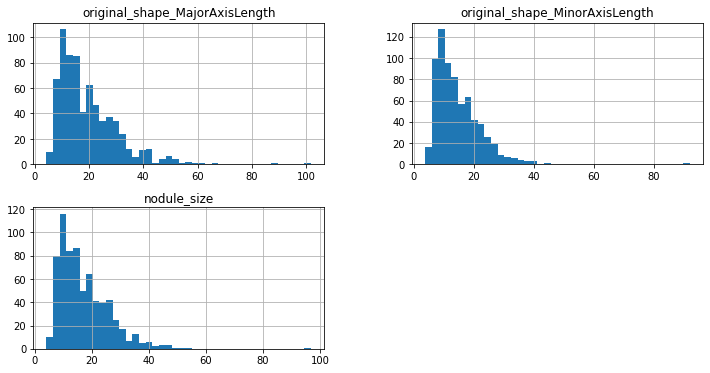

In [20]:
measure_cols = ['original_shape_MajorAxisLength','original_shape_MinorAxisLength'
               ] #'original_shape_Maximum3DDiameter'
chest_measure_tb = chest_tb[measure_cols]
chest_measure_tb['nodule_size'] = chest_tb.apply(lambda x: (x[measure_cols[0]] + x[measure_cols[1]])/2, axis= 1)


print(chest_measure_tb.describe())
fig = chest_measure_tb.hist(bins = 40, figsize=(12, 6))

In [19]:
nodule_types = chest_tb['nodule_type'].value_counts()
print(nodule_types)

GGN          280
solid        226
psolid       186
solidwcal      6
Name: nodule_type, dtype: int64


In [11]:
for nt in nodule_types:
    nt_measure_tb = chest_tb.loc[chest_tb['nodule_type'] == nt, measure_cols]
    print('\n##NODULE TYPE', nt)
    print(nt_measure_tb.describe())
    print('\n\n')


##NODULE TYPE GGN
       original_shape_MajorAxisLength  original_shape_MinorAxisLength  \
count                      280.000000                      280.000000   
mean                        14.184949                       11.289312   
std                          6.628309                        4.633599   
min                          4.283617                        3.763134   
25%                          9.587058                        8.039276   
50%                         12.157932                        9.979305   
75%                         16.533563                       13.281531   
max                         49.520576                       35.860344   

       original_shape_Maximum3DDiameter  
count                        280.000000  
mean                          17.770367  
std                            8.068102  
min                            4.409897  
25%                           12.070483  
50%                           15.349376  
75%                          

In [22]:
a = range(0, 3)
print(a, len(a))

range(0, 3) 3
